In [1]:
card_names = [
    'Snow Covered Island', 
    'Fabled Passage', 
    'Once Upon a Time', 
    'Murderous Rider // Swift End', 
    'Questing Beast', 
    'Oko, Thief of Crowns'
]
card_names_file = [card_name.replace('/', '').replace(',', '').replace('  ', '_').replace(' ', '_') for card_name in card_names]
card_names_file

['Snow_Covered_Island',
 'Fabled_Passage',
 'Once_Upon_a_Time',
 'Murderous_Rider_Swift_End',
 'Questing_Beast',
 'Oko_Thief_of_Crowns']

In [2]:
card_name = card_names[0]

In [3]:
'''
loading the pickled data to plot, produce it in a format ready to be consumed by fusion
'''
import pandas as pd 
from matplotlib import pyplot as plt 
import numpy as np 
import matplotlib 
from sqlalchemy import create_engine
import pickle
from scipy.stats import zscore

%matplotlib inline 
idx = pd.IndexSlice

In [4]:
with open('./pickles/df.pickle', 'rb') as handle:
    df = pickle.load(handle)

In [5]:
df.head(1)

,,seller_name,seller_sales,seller_available_items,item_price,item_amount,item_location,item_condition,item_language,item_is_playset,item_is_foil,avg_sell_price
ts,card_name,,,,,,,,,,,
2019-10-10 16:30:00,Snow Covered Island,toycastle,3357,119435,0.0,1,,NM,English,False,False,0.0


In [6]:
df_pickle = df.loc[idx[str(df.index[-1][0]), card_name], ['item_price', 'item_amount']].\
    reset_index(drop=True).groupby('item_price').sum().reset_index()
df_pickle

,item_price,item_amount
0,0.02,1
1,0.05,2
2,0.08,1
3,0.09,1
4,0.10,9
...,...,...
249,34.00,1
250,39.99,3
251,99.00,8
252,99.99,8


In [7]:
'''
for card_name in df.index.levels[1]:
    # save the dfs 
    file_name = card_name.replace('/', '').replace(',', '').replace('  ', '_').replace(' ', '_')
    df_pickle = df.loc[idx[str(df.index[-1][0]), card_name], ['item_price', 'item_amount']].\
        reset_index(drop=True).groupby('item_price').sum().reset_index()
    df_pickle = df_pickle.rename(columns={'item_price':'label', 'item_amount':'value'})
    df_pickle = df_pickle.astype({'label':str, 'value':str})
    list_pickle = list(df_pickle.T.to_dict().values())
    print(list_pickle)
    with open('./pickles/' + file_name + '_price_distribution_lastest_time_stamp.pickle', 'wb') as handle:
        pickle.dump(list_pickle, handle, protocol=pickle.HIGHEST_PROTOCOL)    
'''

"\nfor card_name in df.index.levels[1]:\n    # save the dfs \n    file_name = card_name.replace('/', '').replace(',', '').replace('  ', '_').replace(' ', '_')\n    df_pickle = df.loc[idx[str(df.index[-1][0]), card_name], ['item_price', 'item_amount']].        reset_index(drop=True).groupby('item_price').sum().reset_index()\n    df_pickle = df_pickle.rename(columns={'item_price':'label', 'item_amount':'value'})\n    df_pickle = df_pickle.astype({'label':str, 'value':str})\n    list_pickle = list(df_pickle.T.to_dict().values())\n    print(list_pickle)\n    with open('./pickles/' + file_name + '_price_distribution_lastest_time_stamp.pickle', 'wb') as handle:\n        pickle.dump(list_pickle, handle, protocol=pickle.HIGHEST_PROTOCOL)    \n"

#javascript code
var flask_data = JSON.parse('{{ data_price_distribution_lastest_time_stamp | tojson | safe}}');
var dataSource = {
    chart: {
        caption: "Item Amount Distribution",
        subcaption: "From latest timestamp",
        xaxisname: "Price",
        yaxisname: "Amount",
        numbersuffix: "units",
        theme: "fusion"
    },
    data: flask_data
};
FusionCharts.ready(function() {
    var chart = new FusionCharts({
        type: 'column2d',
        renderAt: 'chart-container-price_distribution_lastest_time_stamp',
        width: '100%',//100% 700
        height: '700%',//300% 400
        dataFormat: 'json',
        dataSource
    });
    chart.render();

# Removing unnecessary points

In [8]:
df_ = df.loc[idx[str(df.index[-1][0]), card_name], ['item_price', 'item_amount']].\
    reset_index(drop=True)
df_repeated = pd.DataFrame(np.repeat(df_.item_price.values, df_.item_amount.values), columns=['item_price'])
display('df_repeated', df_repeated.shape)
display(df_repeated.head(10))

df_amount = df_.groupby('item_price').sum().reset_index()
display('df_amount', df_amount.shape)
display(df_amount.head(10))

'df_repeated'

(10701, 1)

,item_price
0,0.02
1,0.05
2,0.05
3,0.08
4,0.09
5,0.10
6,0.10
7,0.10
8,0.10
9,0.10


'df_amount'

(254, 2)

,item_price,item_amount
0,0.02,1
1,0.05,2
2,0.08,1
3,0.09,1
4,0.10,9
5,0.11,1
6,0.12,2
7,0.14,1
8,0.15,17
9,0.18,1


In [9]:
# based on filtering done to df_repeated, filter values in df_amount to display the bar plot
df_amount.loc[df_amount.item_price.isin(df_repeated.item_price)].shape

(254, 2)

In [10]:
df_repeated.item_price.max()

299.99

In [11]:
# based on filtering done to df_repeated, filter values in df_dummy to display the bar plot
# note this will include the rows where the item_amount is 0
# also note that the row count is correct because there is no dummy row for the most expensive listing
#df_dummy.loc[df_dummy.item_price <= df_repeated.item_price.max()]

shape (10701, 1)
mean 1.951135407905803
median 0.4875
std 9.609366585560242


Text(0.5, 1.0, 'price distribution at latest timestamp')

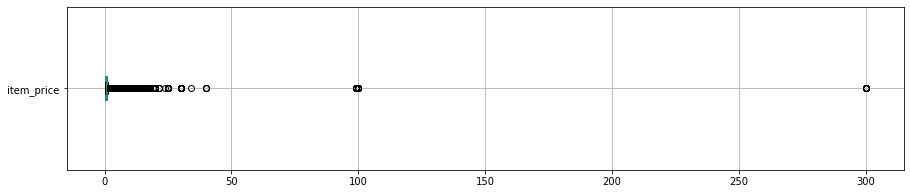

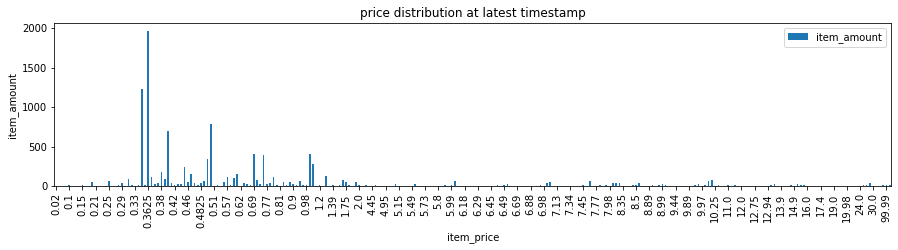

In [12]:
'''
I can plot the amount of offers at each price that is represented in the data
'''
print('shape', df_repeated.shape)
print('mean', df_repeated.item_price.mean())
print('median', df_repeated.item_price.median())
print('std', df_repeated.item_price.std())
df_repeated.boxplot(vert=False, figsize=(15,3))

ax = df_amount.set_index('item_price').plot(kind='bar', figsize=(15,3))

# fix axis
n = 4 # this value should be ajusted according to the number of listings
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]  # <---- blearghk!!
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])
plt.xlabel('item_price')
plt.ylabel('item_amount')
plt.title('price distribution at latest timestamp')

In [13]:
'''
but when i try to interpolate to get the prices that are not represented in the x axis 
LOL 30253 points, there is no way i can plot this, it doesnt stop running


print(df_dummy.shape)
print(df_dummy.item_price.mean())
print(df_dummy.item_price.mean())
print(df_dummy.item_price.std())

ax = df_dummy.set_index('item_price').plot(kind='bar', figsize=(15,2))

# fix axis
n = 4 # this value should be ajusted according to the number of listings
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]  # <---- blearghk!!
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])
plt.xlabel('item_price')
plt.ylabel('item_amount')
plt.title(card_name + ' price distribution at ')
'''

"\nbut when i try to interpolate to get the prices that are not represented in the x axis \nLOL 30253 points, there is no way i can plot this, it doesnt stop running\n\n\nprint(df_dummy.shape)\nprint(df_dummy.item_price.mean())\nprint(df_dummy.item_price.mean())\nprint(df_dummy.item_price.std())\n\nax = df_dummy.set_index('item_price').plot(kind='bar', figsize=(15,2))\n\n# fix axis\nn = 4 # this value should be ajusted according to the number of listings\nticks = ax.xaxis.get_ticklocs()\nticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]  # <---- blearghk!!\nax.xaxis.set_ticks(ticks[::n])\nax.xaxis.set_ticklabels(ticklabels[::n])\nplt.xlabel('item_price')\nplt.ylabel('item_amount')\nplt.title(card_name + ' price distribution at ')\n"

shape (10673, 1)
mean 1.5678150473156565
median 0.4825
std 3.3286225154901734


'\ndf_dummy point count \n'

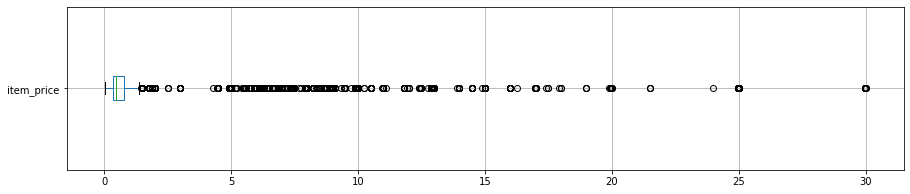

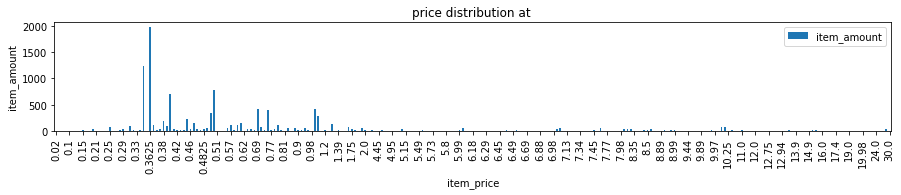

In [14]:
'''
Lets try to trim some of the most expensive cards
'''

'''
In statistics, the standard score is the signed fractional number of standard deviations 
by which the value of an observation or data point is above the mean value of what 
is being observed or measured

only values that are greater than the mean are to be excluded, 
because cheap items are desirable in the representation.
threrefore, the absolute value of the zscore is not used
'''
df_repeated_z_iter_1 = df_repeated[(zscore(df_repeated.item_price) < 3)]
df_filtered = df_repeated_z_iter_1
df_filtered.boxplot(vert=False, figsize=(15,3))
print('shape', df_filtered.shape)
print('mean', df_filtered.item_price.mean())
print('median', df_filtered.item_price.median())
print('std', df_filtered.item_price.std())

'''
df_amount bar plot 
'''
# based on filtering done to df_repeated, filter values in df_amount to display the bar plot
df_ = df_amount.loc[df_amount.item_price.isin(df_filtered.item_price)]
ax = df_.set_index('item_price').plot(kind='bar', figsize=(15,2))

# fix axis
n = 4 # this value should be ajusted according to the number of listings
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]  # <---- blearghk!!
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])
plt.xlabel('item_price')
plt.ylabel('item_amount')
plt.title('price distribution at ')

'''
df_dummy point count 
'''
# based on filtering done to df_repeated, filter values in df_dummy to display the bar plot
# note this will include the rows where the item_amount is 0
# also note that the row count is correct because there is no dummy row for the most expensive listing
#'Ok, %d points, getting better '%df_dummy.loc[df_dummy.item_price <= df_filtered.item_price.max()].shape[0]

shape (10461, 1)
mean 1.2319902494981358
median 0.47
std 2.1982982627931484


'\ndf_dummy point count \n'

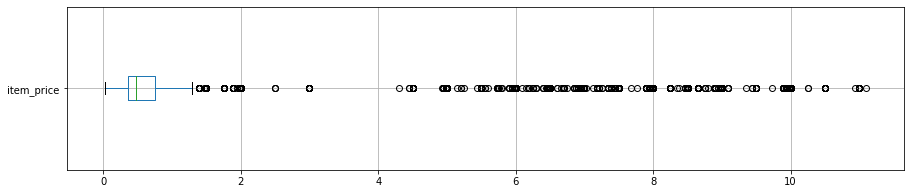

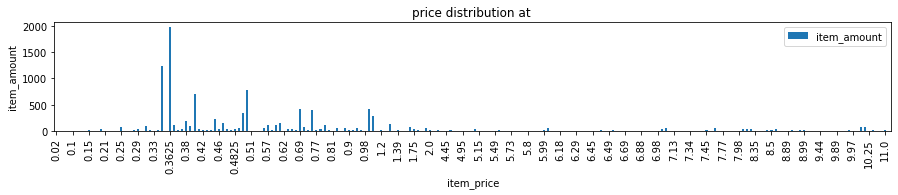

In [15]:
'''
Lets try to trim some of the most expensive cards
'''

'''
In statistics, the standard score is the signed fractional number of standard deviations 
by which the value of an observation or data point is above the mean value of what 
is being observed or measured

only values that are greater than the mean are to be excluded, 
because cheap items are desirable in the representation.
threrefore, the absolute value of the zscore is not used
'''
df_repeated_z_iter_2 = df_repeated_z_iter_1[(zscore(df_repeated_z_iter_1.item_price) < 3)]
df_filtered = df_repeated_z_iter_2
df_filtered.boxplot(vert=False, figsize=(15,3))
print('shape', df_filtered.shape)
print('mean', df_filtered.item_price.mean())
print('median', df_filtered.item_price.median())
print('std', df_filtered.item_price.std())

'''
df_amount bar plot 
'''
# based on filtering done to df_repeated, filter values in df_amount to display the bar plot
df_ = df_amount.loc[df_amount.item_price.isin(df_filtered.item_price)]
ax = df_.set_index('item_price').plot(kind='bar', figsize=(15,2))

# fix axis
n = 4 # this value should be ajusted according to the number of listings
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]  # <---- blearghk!!
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])
plt.xlabel('item_price')
plt.ylabel('item_amount')
plt.title('price distribution at ')

'''
df_dummy point count 
'''
# based on filtering done to df_repeated, filter values in df_dummy to display the bar plot
# note this will include the rows where the item_amount is 0
# also note that the row count is correct because there is no dummy row for the most expensive listing
#'Ok, %d points, getting better '%df_dummy.loc[df_dummy.item_price <= df_filtered.item_price.max()].shape[0]

'df_dummy'

(1363, 2)

,item_price,item_amount
0,0.00,0
1,0.01,0
2,0.02,1
3,0.02,0
4,0.03,0
5,0.04,0
6,0.05,2
7,0.05,0
8,0.06,0
9,0.07,0


shape (1315, 2)
mean 5.343030418250951
median 5.49
std 3.2953977840908095


Text(0.5, 1.0, 'price distribution at ')

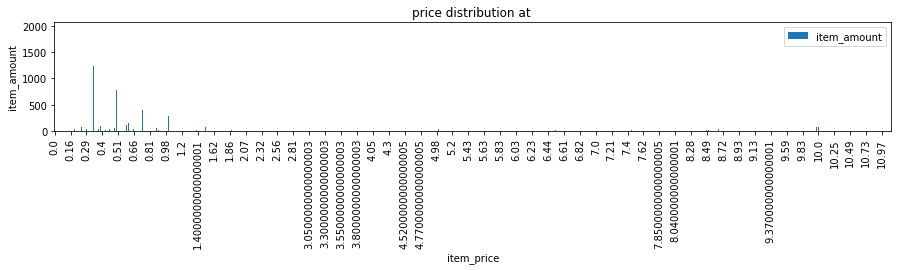

In [16]:
'''
df_dummy
'''
start = 0.0
stop = df_.item_price.max()
step = 0.01
item_price_ = np.arange(start, stop, step)
df__ = pd.DataFrame([(item_price_[i], 0) for i in range(len(item_price_))], columns=['item_price', 'item_amount'])
df_dummy = df__.append(df_amount).sort_values(by=['item_price']).reset_index(drop=True)
display('df_dummy', df_dummy.shape)
display(df_dummy.head(10))

'''
let's try to plot with the interpolated points
Now it runs!! and we have the data that is relevant to us
'''
df_plot = df_dummy.loc[df_dummy.item_price <= df_repeated_z_iter_2.item_price.max()]
ax = df_plot.set_index('item_price').plot(kind='bar', figsize=(15,2))

print('shape', df_plot.shape)
print('mean', df_plot.item_price.mean())
print('median', df_plot.item_price.median())
print('std', df_plot.item_price.std())

# fix axis
n = 25 # this value should be ajusted according to the number of listings
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]  # <---- blearghk!!
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])
plt.xlabel('item_price')
plt.ylabel('item_amount')
plt.title('price distribution at ')

Text(0.5, 1.0, 'price distribution at ')

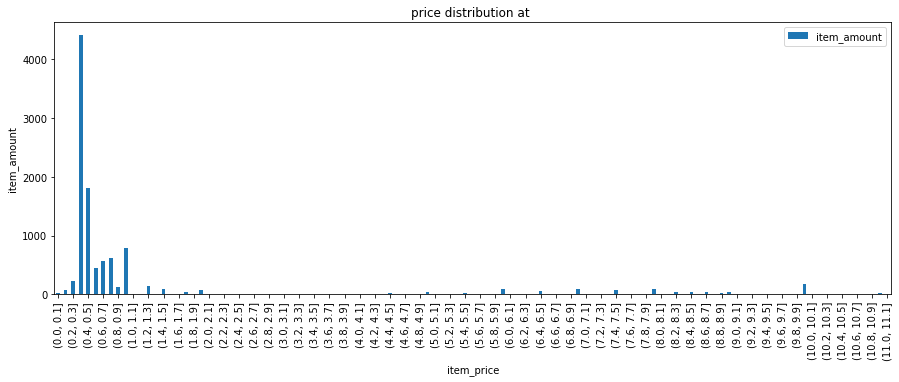

In [17]:
'''
Finally, lets bin the data so that we can actually see the bars
'''

df_plot_ = df_plot.set_index('item_price')

# the range of each bin
bin_span = round(df_plot_.index.max()/110, 2)

df_plot_binned = df_plot_.\
    groupby(pd.cut(df_plot_.index, np.arange(0, df_plot_.index.max() + bin_span, bin_span))).sum()

ax = df_plot_binned.plot(kind='bar', figsize=(15,5))

# fix axis
n = 2 # this value should be ajusted according to the number of listings
ticks = ax.xaxis.get_ticklocs()
ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]  # <---- blearghk!!
ax.xaxis.set_ticks(ticks[::n])
ax.xaxis.set_ticklabels(ticklabels[::n])
plt.xlabel('item_price')
plt.ylabel('item_amount')
plt.title('price distribution at ')

In [18]:
df_plot_.index.max()/110

0.10081818181818182

In [19]:
df_plot.item_price.median()/110

0.04990909090909091